### <span style="color:#FF00FF">Data Exploration</span>

### Distribution of Approval Status:
Graph: Bar plot showing the count of Approved and Rejected applications.
Observation: Understanding the distribution of approval status in the dataset.

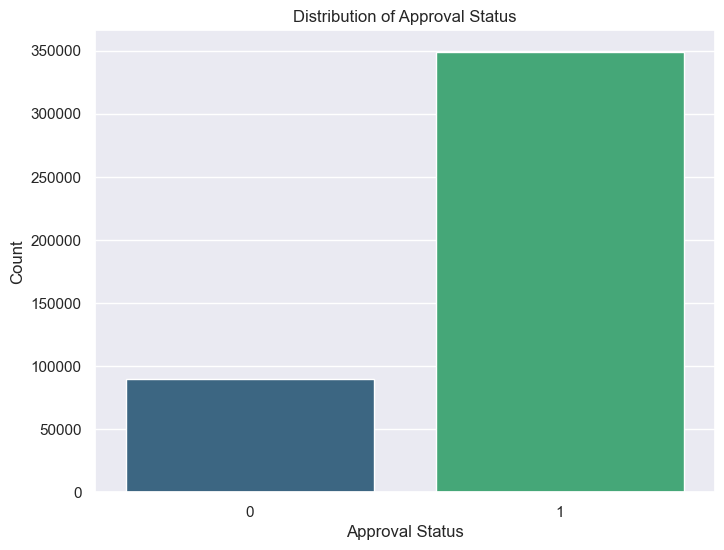

Observations:
1    348814
0     89743
Name: Approval Status, dtype: int64


In [30]:
sns.set(style='darkgrid')

# Extracting relevant data
approval_status_counts = application_df['Approval Status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Approval Status', data=application_df, palette='viridis')
plt.title('Distribution of Approval Status')
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.show()

# Displaying observations
print("Observations:")
print(approval_status_counts)


### Credit Score Distribution:
Graph: Histogram showing the distribution of credit scores.
Observation: Analyzing the spread of credit scores in the dataset.

Observation: Analyze the spread and concentration of credit scores in the dataset.

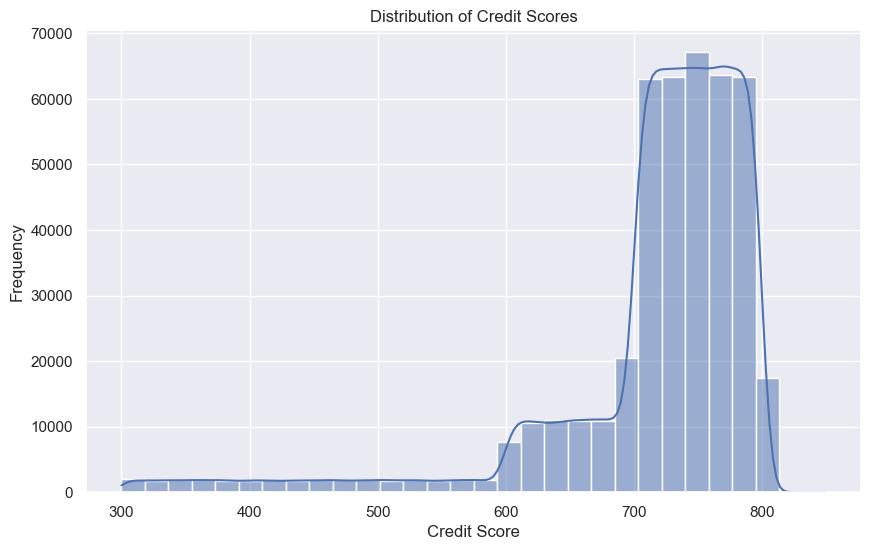

Observations:
count    438557.000000
mean        716.039350
std          87.206648
min         300.000000
25%         706.000000
50%         737.000000
75%         768.000000
max         850.000000
Name: Credit Score, dtype: float64


In [81]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(application_df['Credit Score'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Displaying observations
print("Observations:")
print(application_df['Credit Score'].describe())

### Approval Status by Credit Status:
Graph: Stacked bar plot showing the count of Approved and Rejected applications based on Credit Status.
Observation: Understanding how credit status relates to approval status.

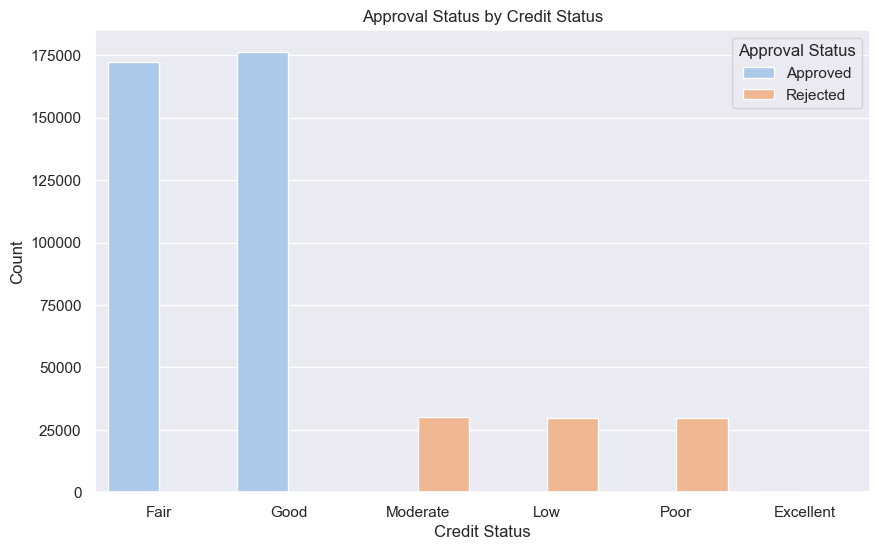

Observations:
Approval Status        Approved  Rejected
Credit Score Category                    
Excellent                    75         0
Fair                     172482         0
Good                     176257         0
Low                           0     29903
Moderate                      0     30233
Poor                          0     29607


In [82]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit Score Category', hue='Approval Status', data=application_df, palette='pastel')
plt.title('Approval Status by Credit Status')
plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.legend(title='Approval Status')
plt.show()

# Displaying observations
print("Observations:")
approval_by_credit_status = pd.crosstab(application_df['Credit Score Category'], application_df['Approval Status'])
print(approval_by_credit_status)


### Rejection Reasons Analysis
Observation:

Identifying the common reasons for application rejections.
Helps to address and understand the areas of improvement.

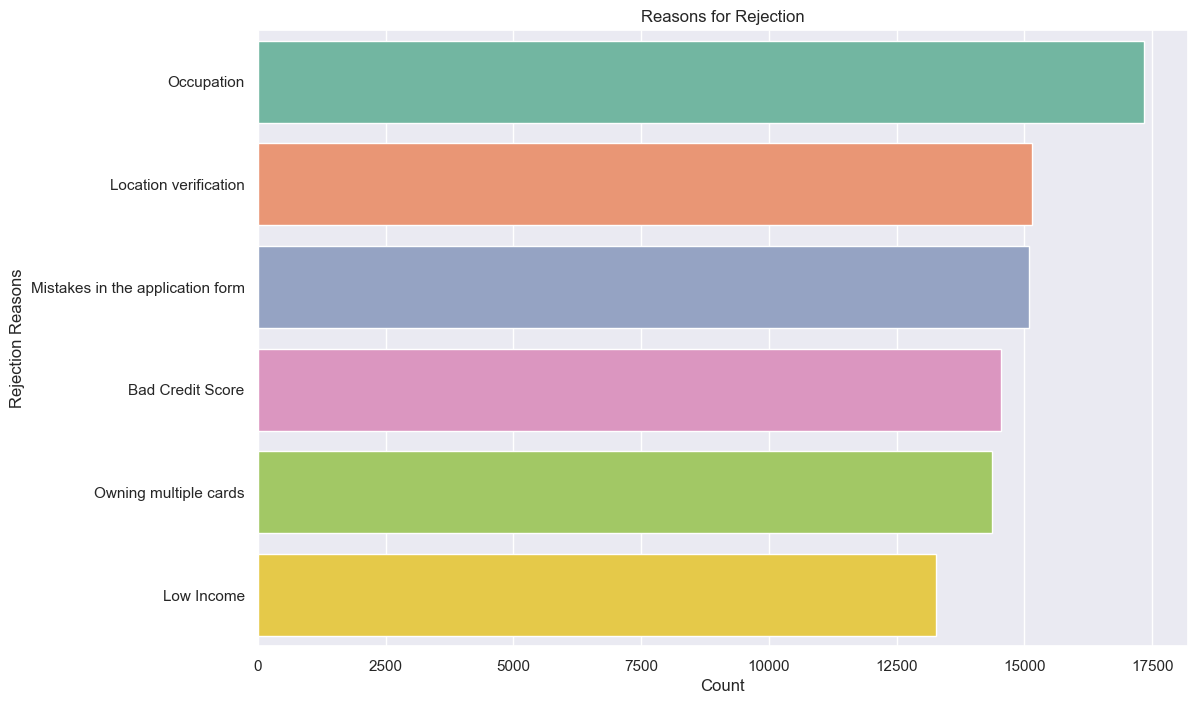

Observations:
Occupation                          17332
Location verification               15142
Mistakes in the application form    15091
Bad Credit Score                    14549
Owning multiple cards               14359
Low Income                          13270
Name: Reason for Rejection, dtype: int64


In [83]:
# Filtering only rejected applications
rejected_df = application_df[application_df['Approval Status'] == 'Rejected']

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(y='Reason for Rejection', data=rejected_df, order=rejected_df['Reason for Rejection'].value_counts().index, palette='Set2')
plt.title('Reasons for Rejection')
plt.xlabel('Count')
plt.ylabel('Rejection Reasons')
plt.show()

# Displaying observations
print("Observations:")
print(rejected_df['Reason for Rejection'].value_counts())


### Credit Status Distribution for Approved Applications:
Graph: Pie chart showing the distribution of Credit Status for approved applications.
Observation: Understanding the proportion of different credit statuses among approved applications.

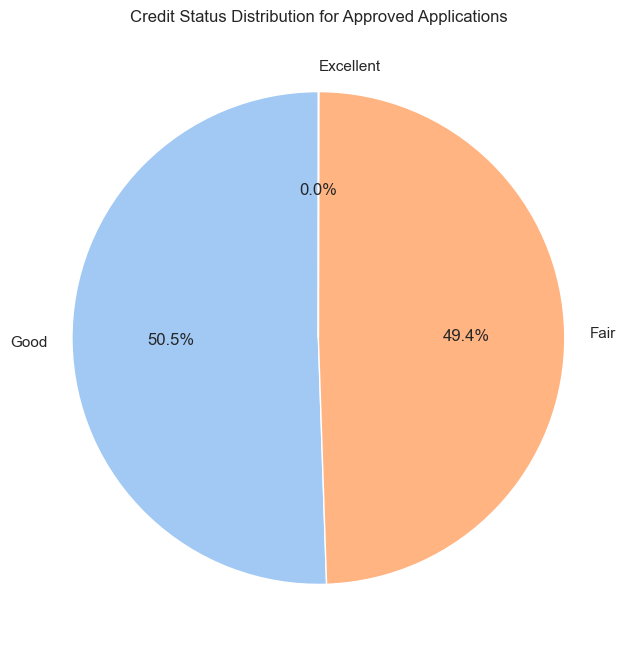

Observations:
Good         176257
Fair         172482
Excellent        75
Name: Credit Score Category, dtype: int64


In [84]:
# Filtering only approved applications
approved_df = application_df[application_df['Approval Status'] == 'Approved']

# Plotting
plt.figure(figsize=(8, 8))
approved_credit_status_counts = approved_df['Credit Score Category'].value_counts()
plt.pie(approved_credit_status_counts, labels=approved_credit_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Credit Status Distribution for Approved Applications')
plt.show()

# Displaying observations
print("Observations:")
print(approved_credit_status_counts)


### Income Type vs. Approval Status
Observation:

Checking how different income types correlate with approval status.
Provides insights into the approval/rejection patterns based on income sources.

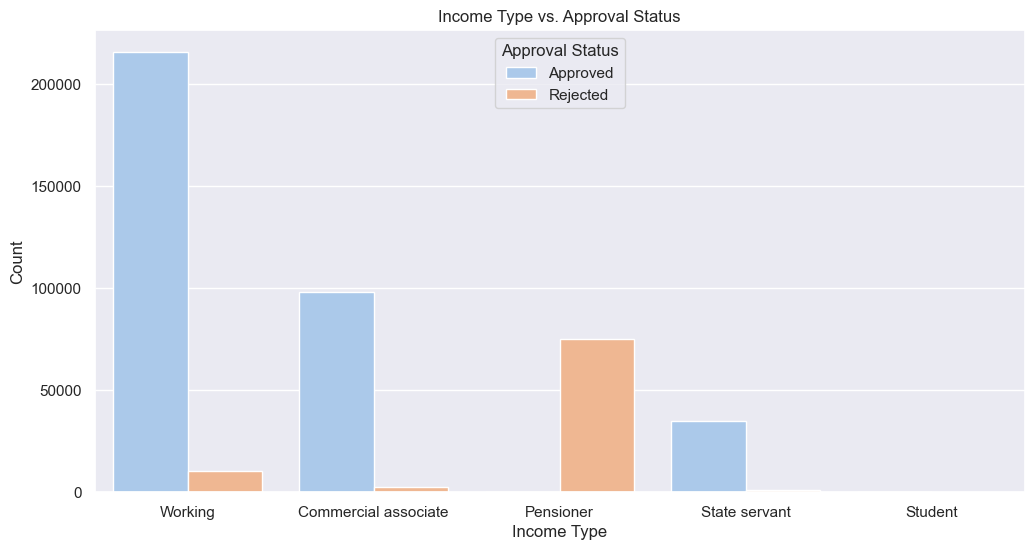

In [85]:
# Plotting the count of approval status based on income type
plt.figure(figsize=(12, 6))
sns.countplot(x='Income Type', hue='Approval Status', data=application_df, palette='pastel')
plt.title('Income Type vs. Approval Status')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.show()


### Age Distribution of Applicants

Observation:

Understanding the age distribution of credit applicants.
May reveal trends or preferences among different age groups.

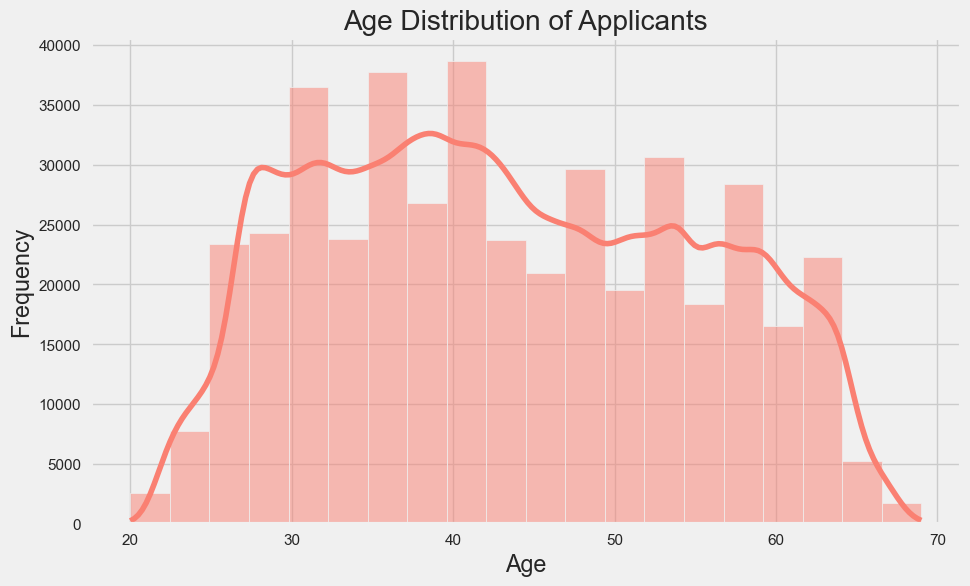

In [166]:

# Plotting the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(application_df['Age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution of Applicants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Correlation Heatmap
Observation: Examine the correlation between numerical variables in the dataset.

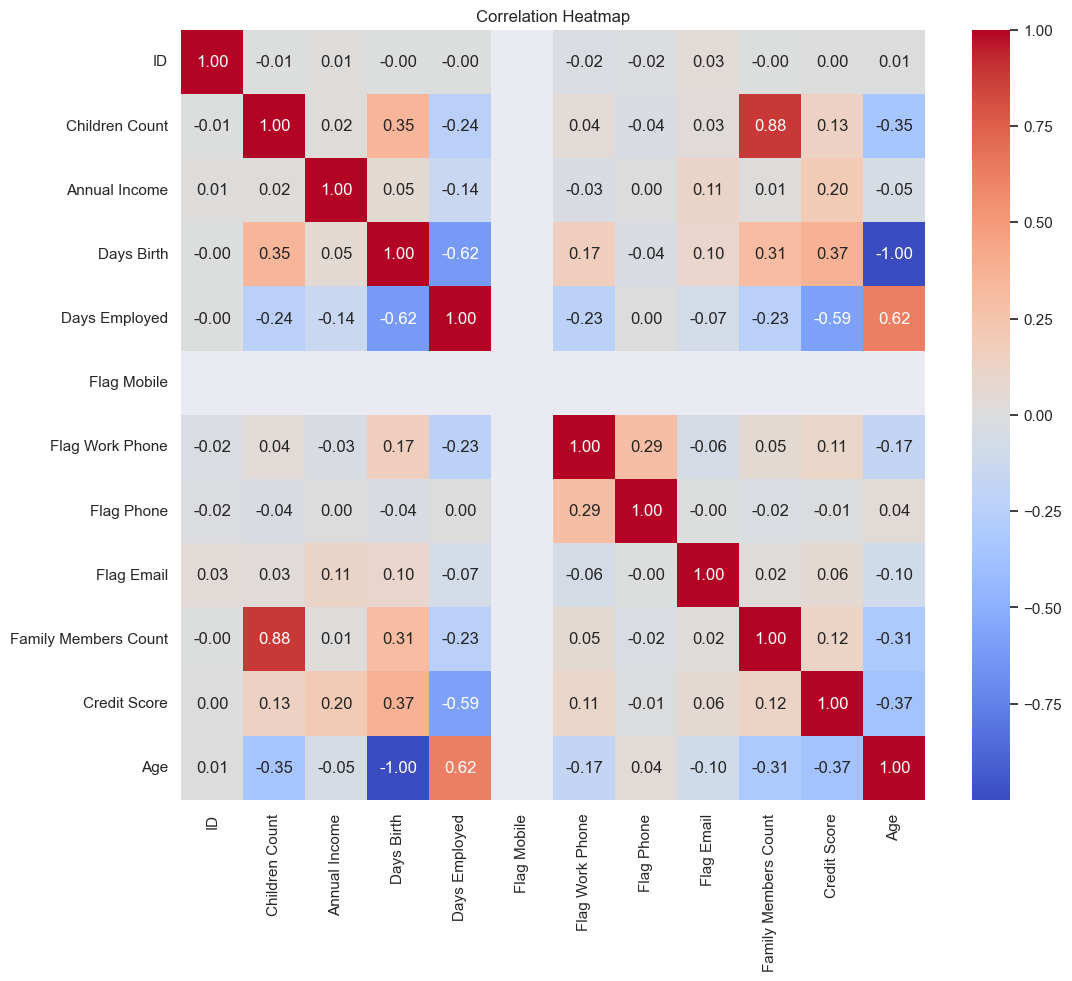

In [87]:
# Correlation Heatmap
correlation_matrix = application_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Family Status Distribution:
Observation: Explore the count of applications based on different family statuses.

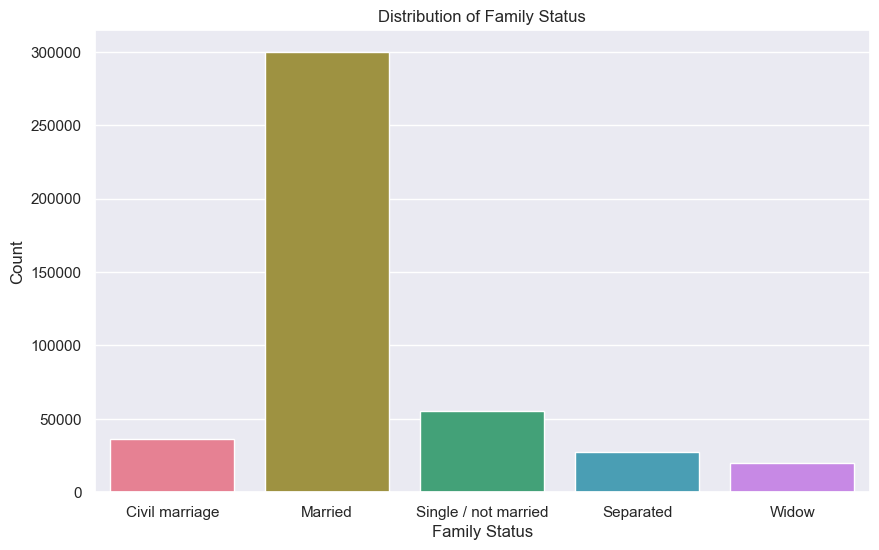

In [88]:
# Count of Family Status
plt.figure(figsize=(10, 6))
sns.countplot(data=application_df, x='Family Status', palette='husl')
plt.title('Distribution of Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.show()

### Credit Score vs. Days Employed
Observation: Explore how the credit score relates to the number of days employed, with points color-coded by approval status.

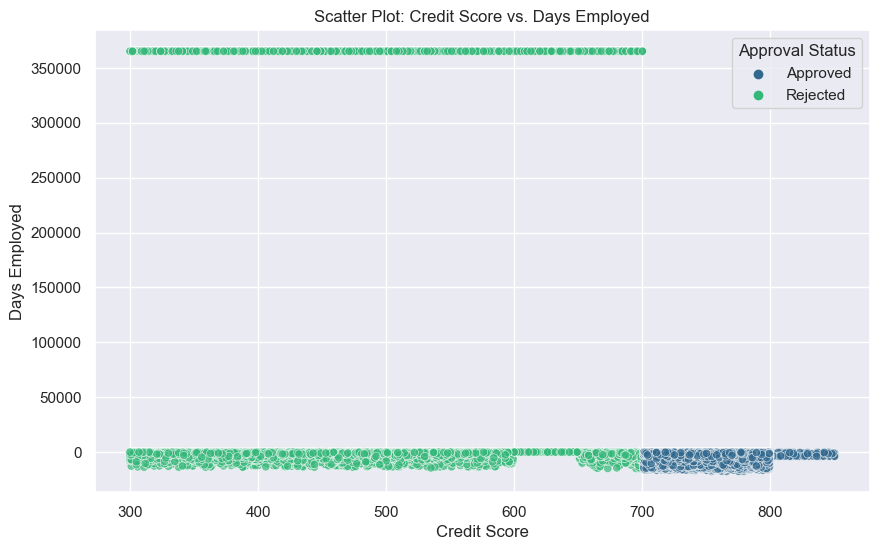

In [89]:
# Scatter plot: Credit Score vs. Days Employed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=application_df, x='Credit Score', y='Days Employed', hue='Approval Status', palette='viridis', alpha=0.7)
plt.title('Scatter Plot: Credit Score vs. Days Employed')
plt.xlabel('Credit Score')
plt.ylabel('Days Employed')
plt.legend(title='Approval Status')
plt.show()


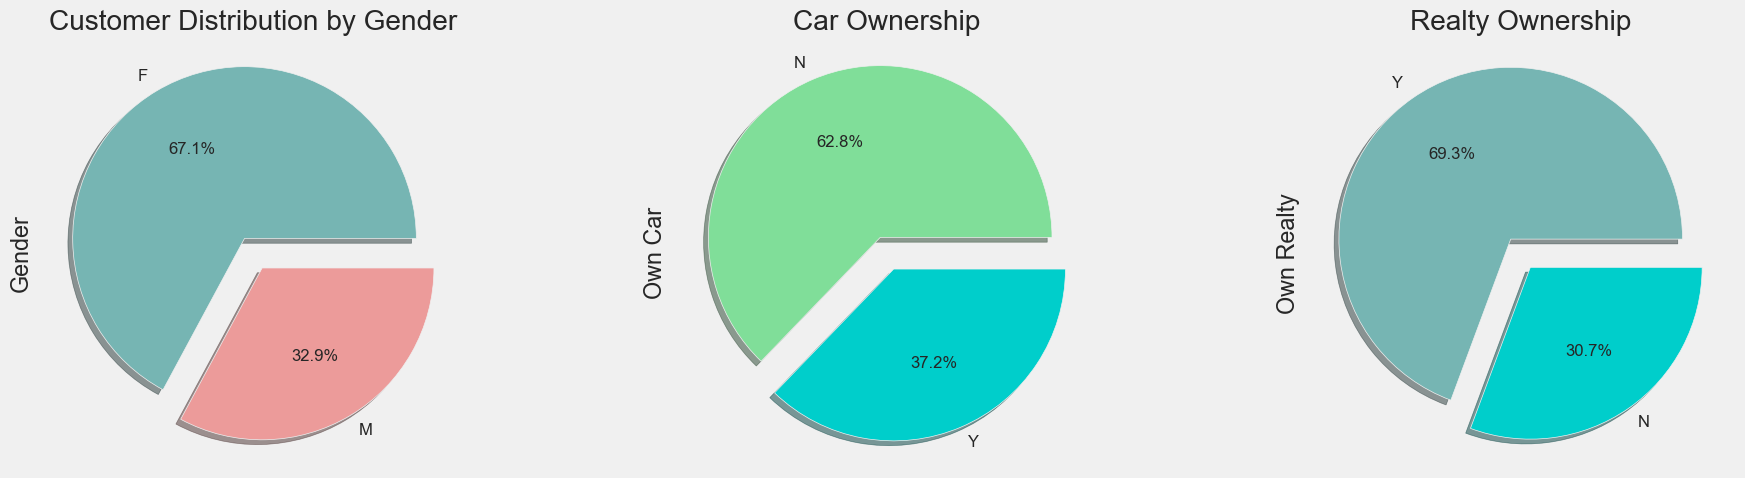

In [99]:
fig, axes = plt.subplots(1,3)

g1= application_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= application_df['Own Car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= application_df['Own Realty'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(20,5)

plt.tight_layout()

plt.show()

    Since nrows is smaller than dataset, loading random sample of 300000 rows into pandas...
Shape of your Data Set loaded: (300000, 25)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    25 Predictors classified...
        4 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID', 'Flag Mobile', 'unemployed', 'Unemployed']
Since Number of Rows in data 300000 exceeds maximum, randomly sampling 300000 rows for EDA...
To fix data quality issues automatically, import FixDQ from autoviz...


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,int64,0.000000,99,5008804.000000,7999952.000000,has 2331 outliers greater than upper bound (7721067.75) or lower than lower bound(4342643.75). Cap them or remove them.
Gender,int64,0.000000,0,0.000000,1.000000,No issue
Own Car,int64,0.000000,0,0.000000,1.000000,No issue
Own Realty,int64,0.000000,0,0.000000,1.000000,No issue
Children Count,int64,0.000000,0,0.000000,14.000000,has 4116 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Annual Income,float64,0.000000,NA,26100.000000,6750000.000000,has 13075 outliers greater than upper bound (380250.00) or lower than lower bound(-33750.00). Cap them or remove them.
Income Type,object,0.000000,0,nan,nan,1 rare categories: ['Student']. Group them into a single category or drop the categories.
Education,object,0.000000,0,nan,nan,"2 rare categories: ['Lower secondary', 'Academic degree']. Group them into a single category or drop the categories."
Family Status,object,0.000000,0,nan,nan,No issue
Housing Type,object,0.000000,0,nan,nan,"2 rare categories: ['Office apartment', 'Co-op apartment']. Group them into a single category or drop the categories."


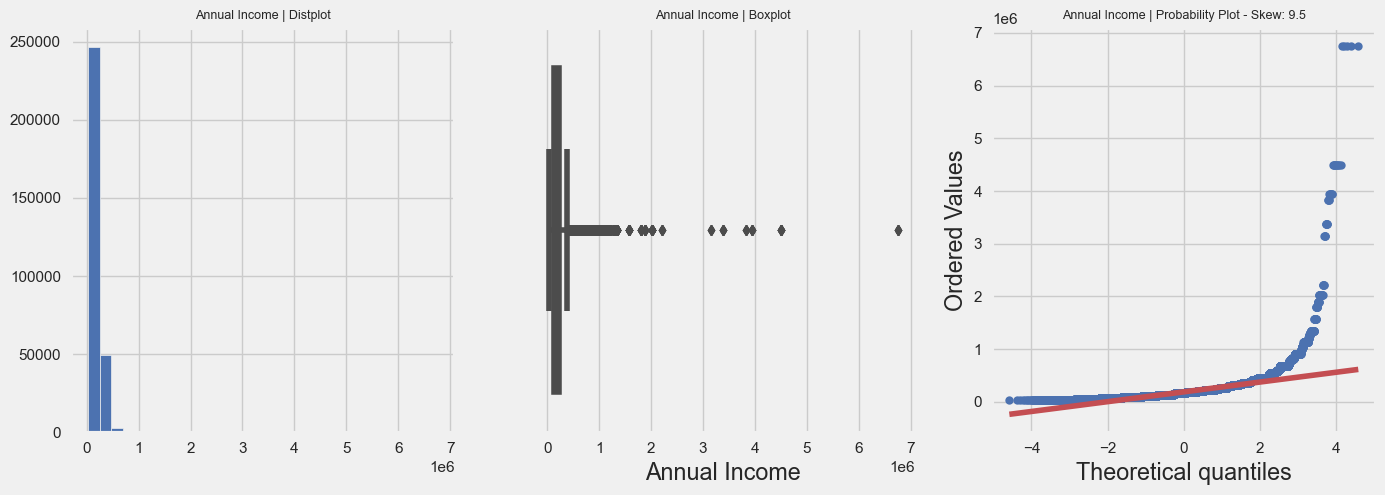

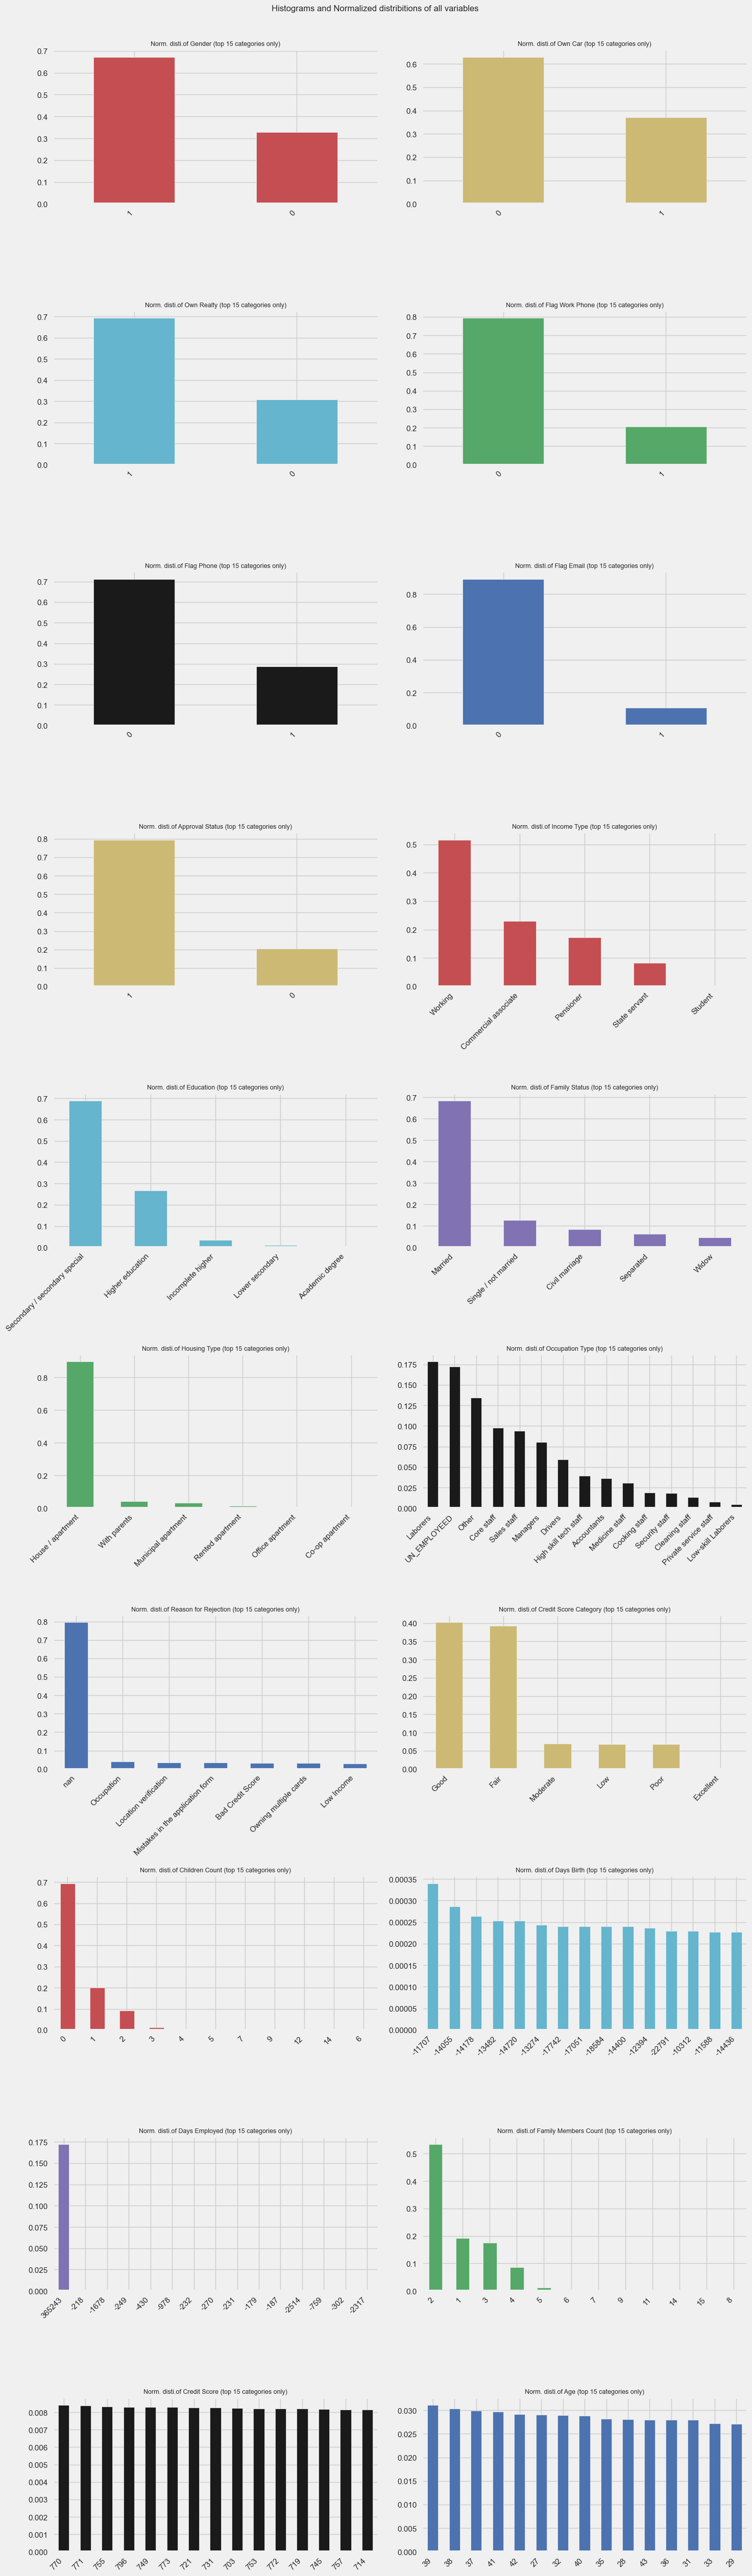

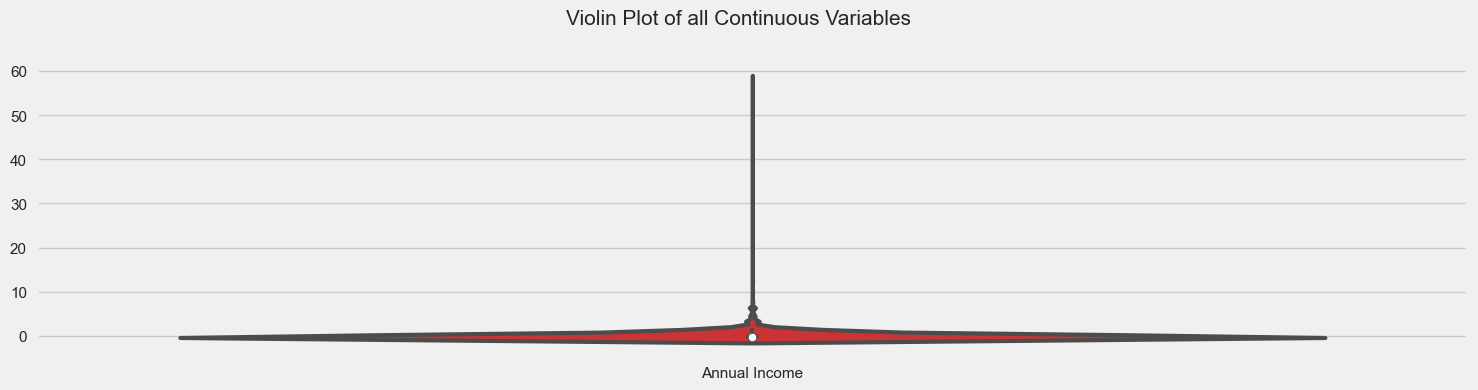

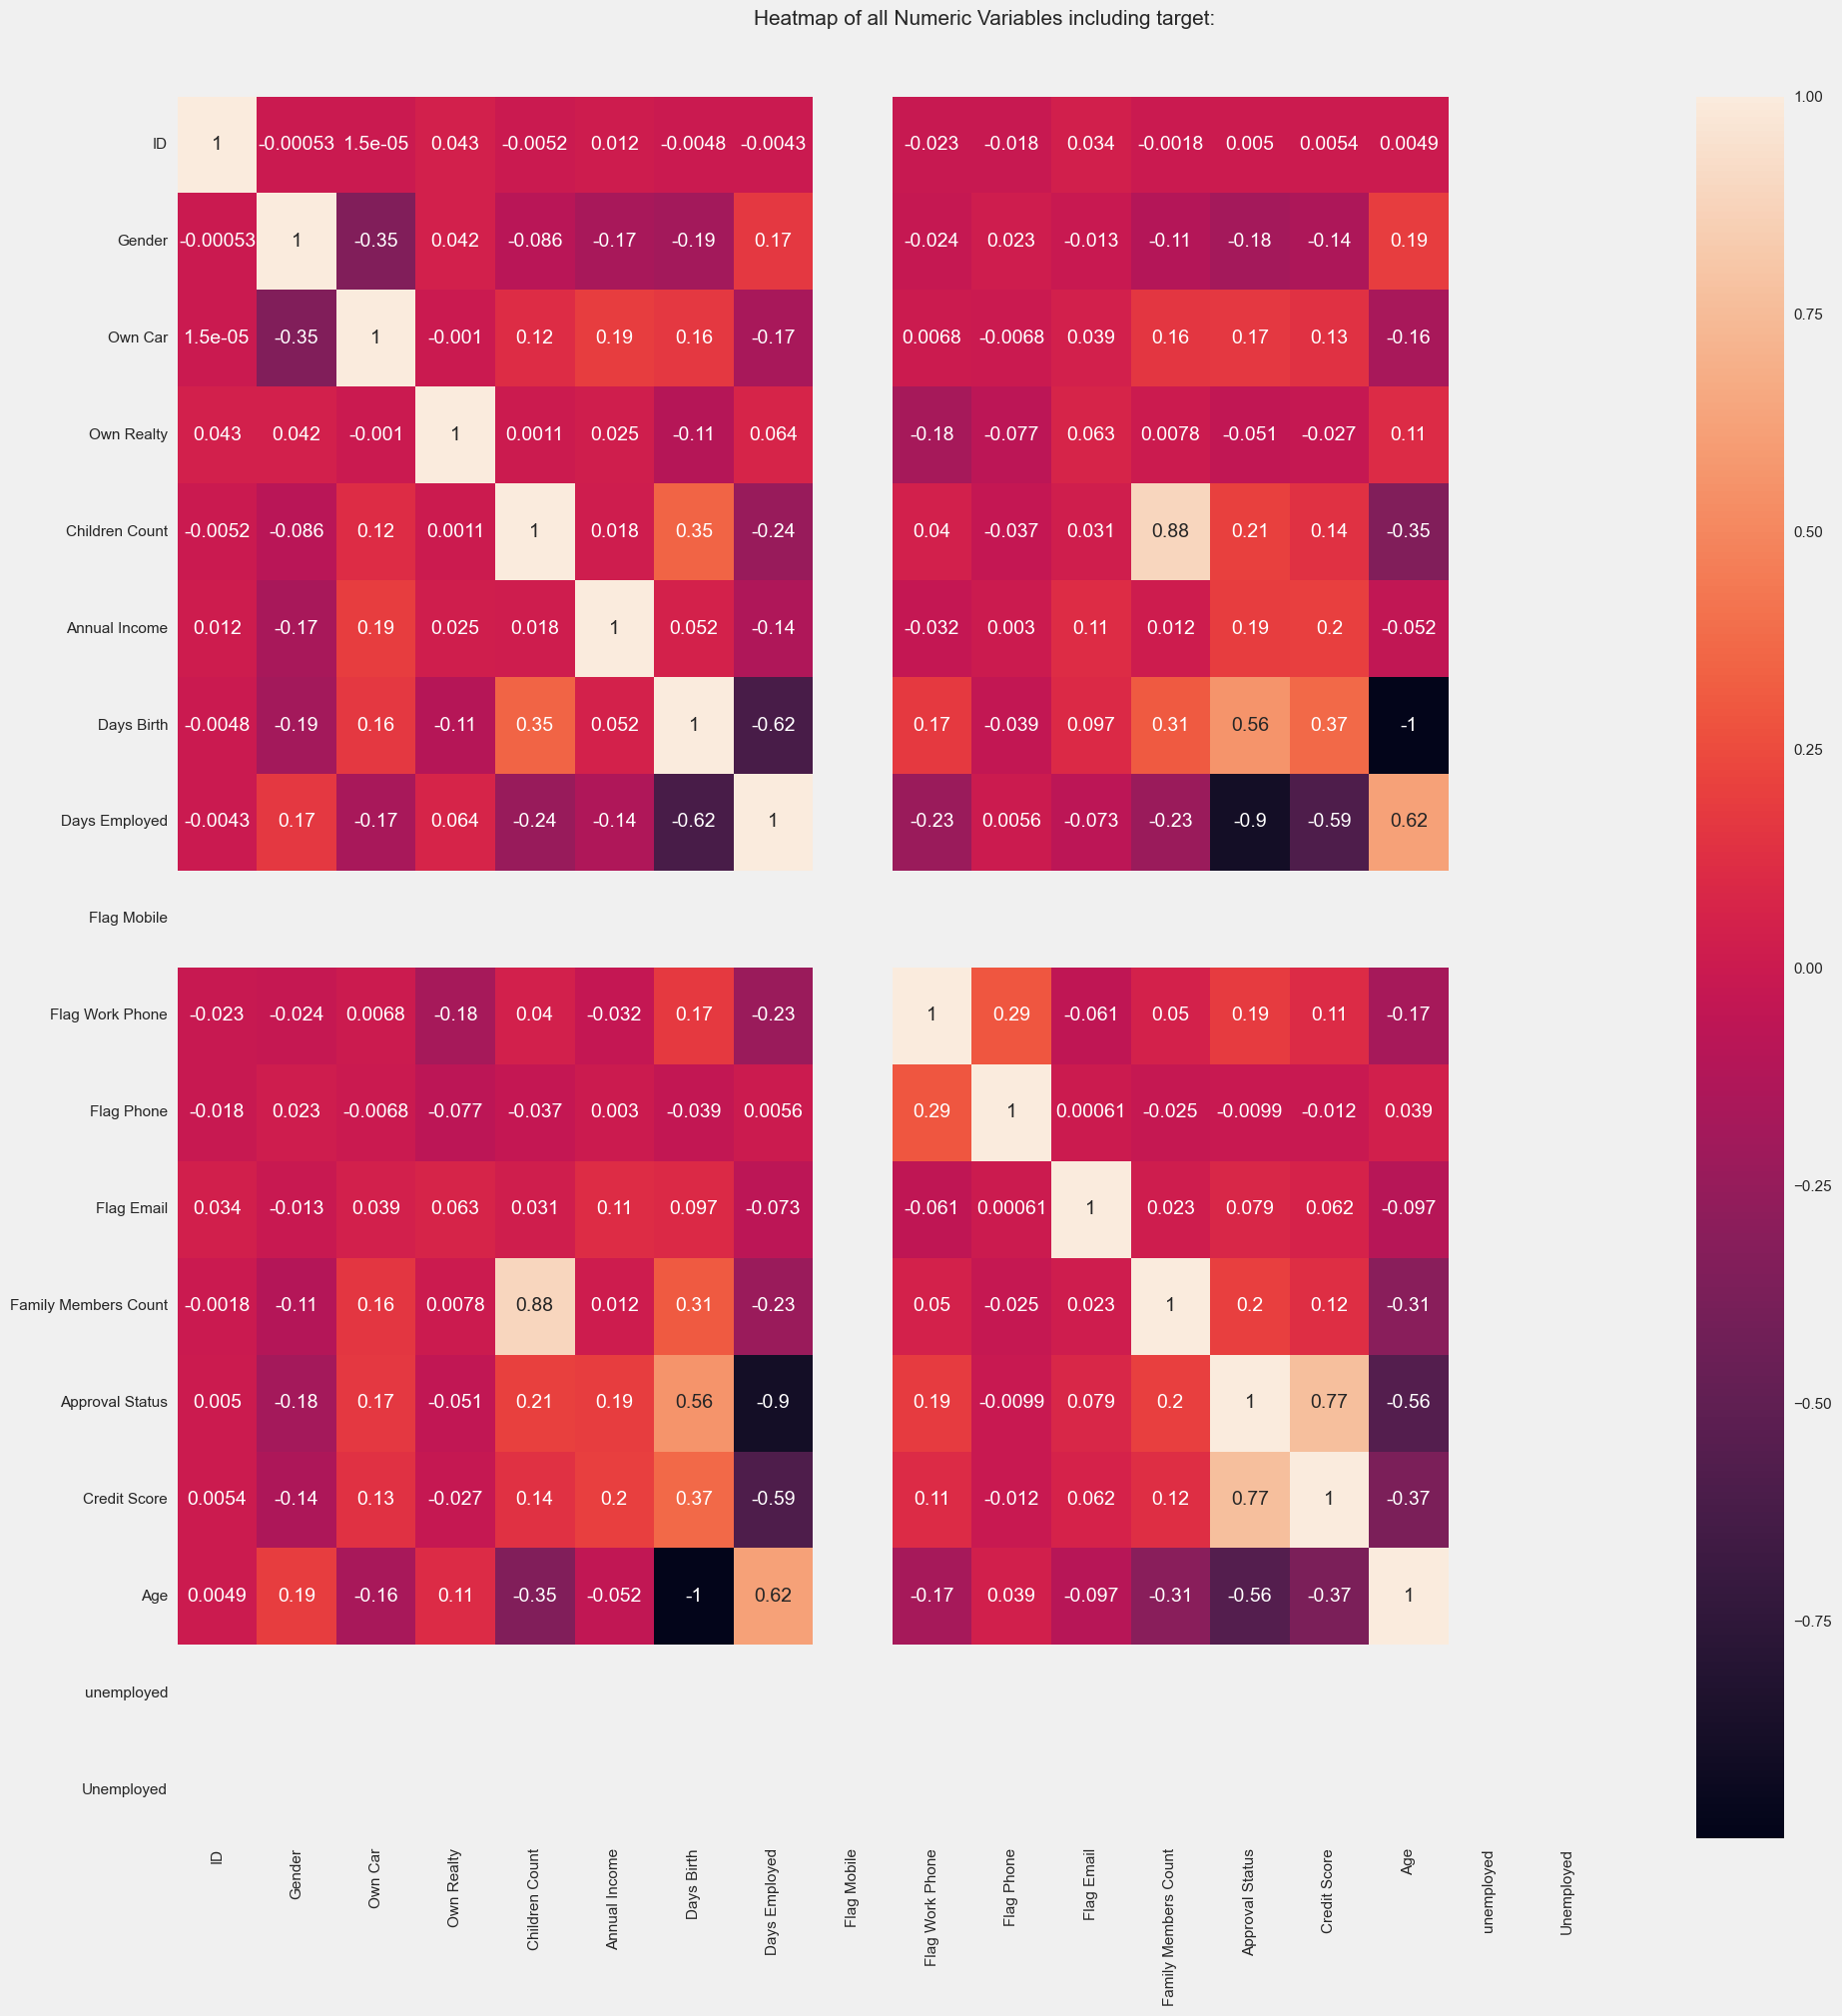

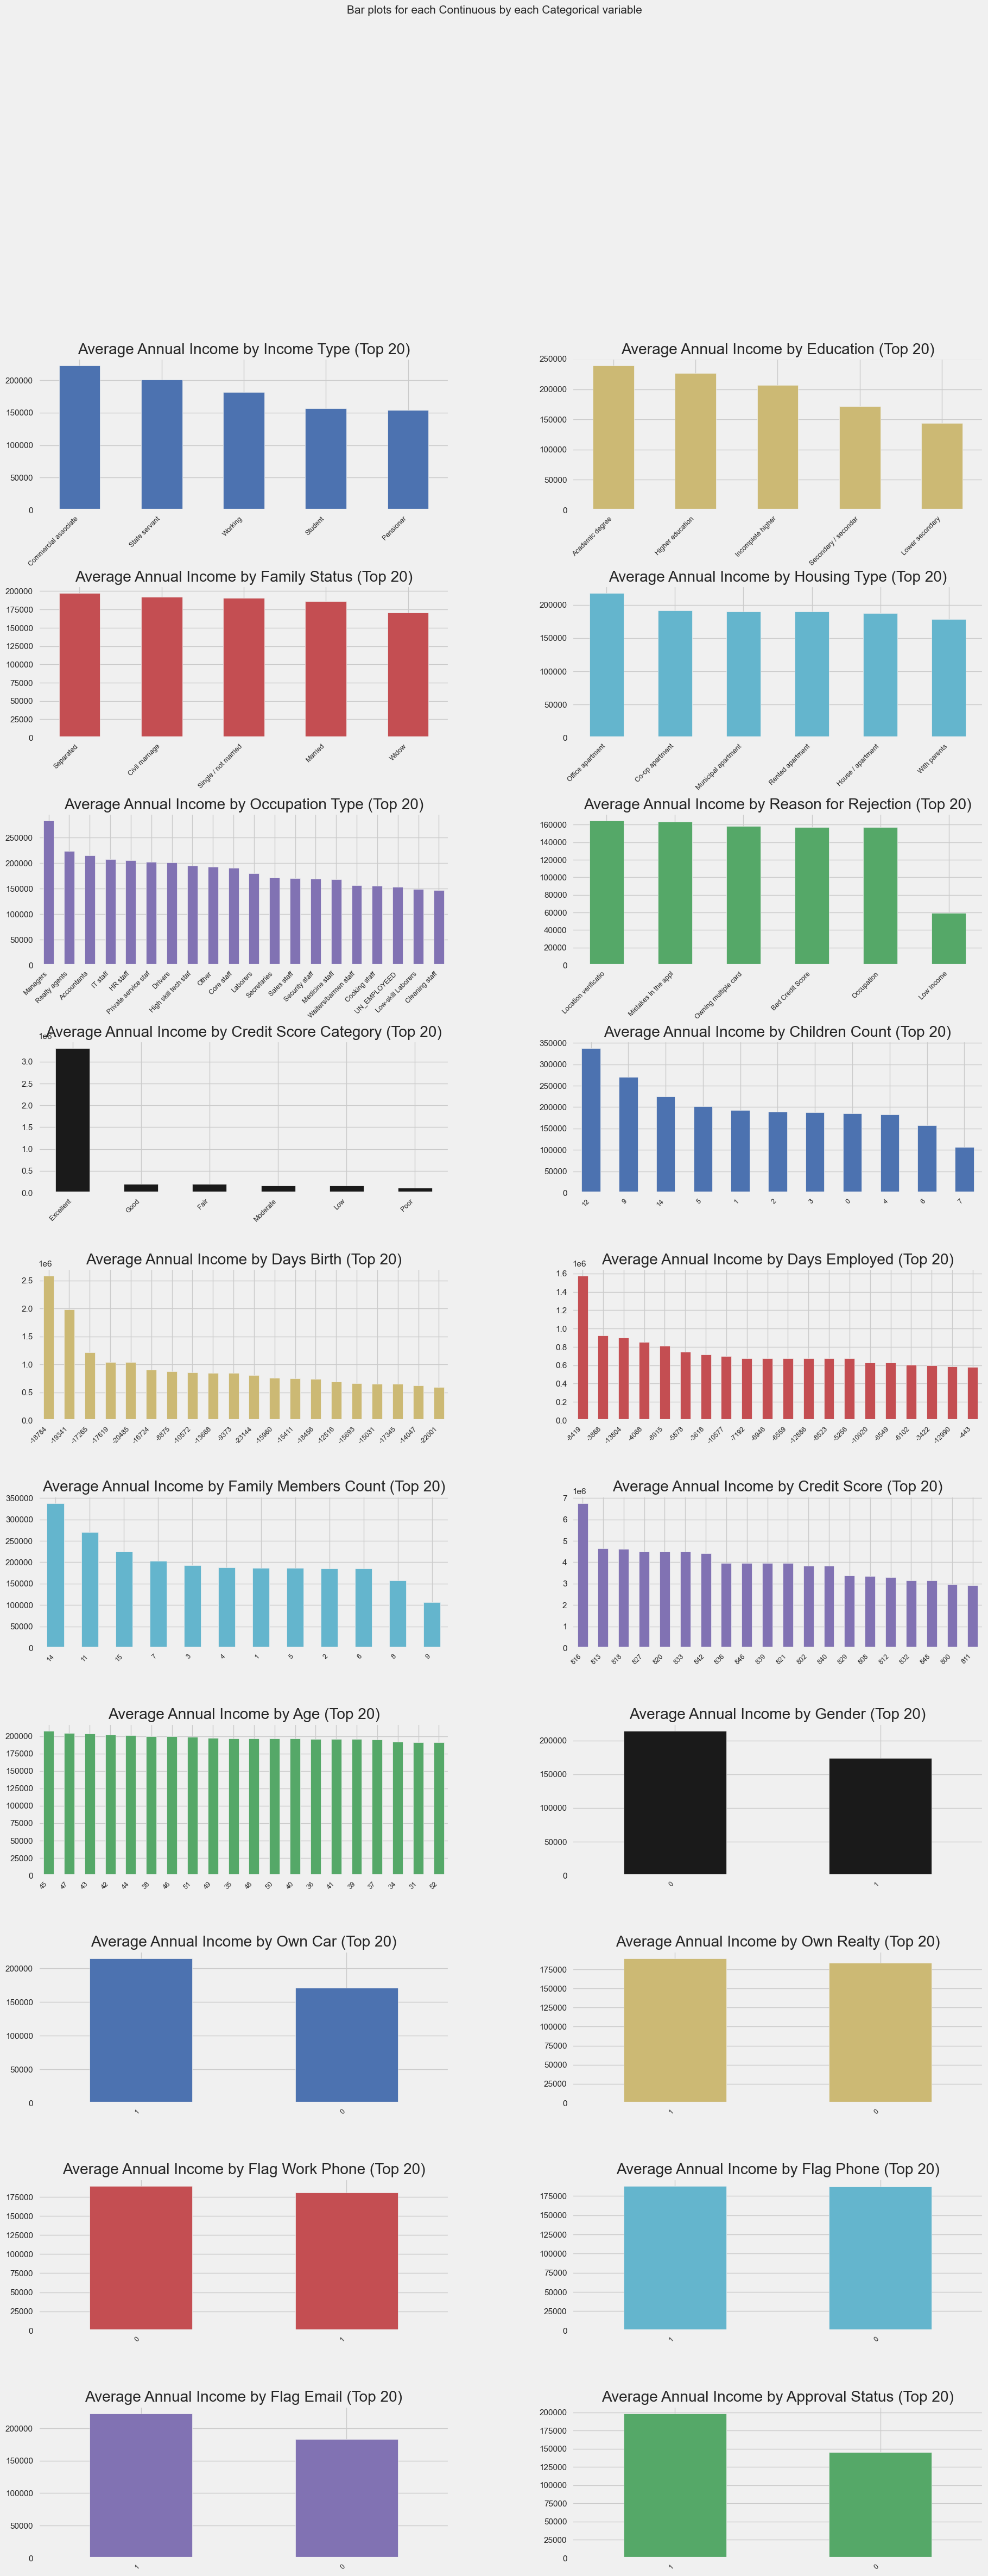

All Plots done
Time to run AutoViz = 21 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [110]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()

target_variable = "Approval Status"

dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=application_df,
    header=0, 
    verbose=1, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=300000, 
    max_cols_analyzed=30
)